In [24]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os




# Data Augmentation

In [25]:
Data_Directory = './Data/12_Sep_Readings'

# file = './Data_1/ble_datalog_2024-09-12_16-05-30.csv'

In [26]:
coord_mapping = {
    'ble_datalog_2024-09-12_16-05-30.csv': (1, 1),
    'ble_datalog_2024-09-12_15-57-06.csv': (3, 1),
    'ble_datalog_2024-09-12_15-38-16.csv': (5, 1),
    'ble_datalog_2024-09-12_15-48-01.csv': (7, 1),
    'ble_datalog_2024-09-12_16-15-03.csv': (1, 3),
    'ble_datalog_2024-09-12_16-30-02.csv': (3, 3),
    'ble_datalog_2024-09-12_16-37-48.csv': (5, 3),
    'ble_datalog_2024-09-12_16-47-14.csv': (7, 3),
    'ble_datalog_2024-09-12_17-11-06.csv': (3, 5),
    'ble_datalog_2024-09-12_17-03-48.csv': (5, 5),
    'ble_datalog_2024-09-12_16-54-24.csv': (7, 5)
    # Add more mappings as needed
}


In [27]:
def normalize_time_columns(df, time_columns):
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], format='%H-%M-%S')
        min_time = df[col].min()
        df[col] = (df[col] - min_time).dt.total_seconds()
    return df

# Function to process each CSV file
def process_csv(file_path, x_coord, y_coord):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Add X_Coord and Y_Coord from mapping
    data['X_Coord'] = x_coord
    data['Y_Coord'] = y_coord

    # Identify and normalize time columns
    time_columns = [col for col in data.columns if 'Time' in col]
    data = normalize_time_columns(data, time_columns)

    return data

# Main function to process all CSV files in a directory
def combine_all_csvs(directory, coord_mapping):
    combined_data = []  # List to store individual DataFrames
    
    for filename in coord_mapping.keys():
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)

            # Get X_Coord and Y_Coord from the mapping
            if filename in coord_mapping:
                x_coord, y_coord = coord_mapping[filename]
            else:
                # Default coordinates if not in the mapping
                x_coord, y_coord = (0, 0)

            # Process CSV and add to the list
            data = process_csv(file_path, x_coord, y_coord)
            combined_data.append(data)

    # Concatenate all DataFrames into one large DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df



In [28]:
combined_df = combine_all_csvs(Data_Directory, coord_mapping)

# Now print the DataFrame
combined_df

,Tx_0 RSSI,Tx_0 Batt,Tx_0 Time,Tx_1 RSSI,Tx_1 Batt,Tx_1 Time,Tx_2 RSSI,Tx_2 Batt,Tx_2 Time,Tx_3 RSSI,...,Tx_5 Batt,Tx_5 Time,Tx_6 RSSI,Tx_6 Batt,Tx_6 Time,Tx_7 RSSI,Tx_7 Batt,Tx_7 Time,X_Coord,Y_Coord
0,-61,4.18,0.0,-77,4.19,0.0,-74,4.17,0.0,-77,...,4.14,0.0,-72,-2.00,0.0,127,-99.00,0.0,1,1
1,-61,4.19,0.0,-80,4.17,0.0,-75,4.16,0.0,-78,...,4.14,0.0,-71,4.16,0.0,127,-99.00,0.0,1,1
2,-61,4.19,0.0,-79,4.18,0.0,-75,4.16,0.0,-79,...,4.14,0.0,-71,4.17,0.0,127,-99.00,0.0,1,1
3,-61,4.18,0.0,-80,4.20,0.0,-73,4.17,0.0,-76,...,4.13,0.0,-71,-2.00,0.0,127,-99.00,0.0,1,1
4,-61,4.19,0.0,-78,-2.00,0.0,-74,4.16,0.0,-79,...,-2.00,0.0,-71,-2.00,0.0,127,-99.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-74,4.19,0.0,127,-99.00,0.0,-78,4.17,0.0,-60,...,4.15,0.0,-63,-2.00,0.0,-84,-2.00,0.0,7,5
106,-73,-2.00,0.0,127,-99.00,0.0,-79,4.17,0.0,-60,...,4.14,0.0,-63,4.18,0.0,-82,4.18,0.0,7,5
107,-72,4.18,0.0,-81,4.18,0.0,-79,4.16,0.0,-60,...,4.14,0.0,-62,-2.00,0.0,-82,4.18,0.0,7,5
108,-74,-2.00,0.0,-82,4.18,0.0,-77,-2.00,0.0,-60,...,-2.00,0.0,-63,4.18,0.0,-81,4.19,0.0,7,5


In [29]:
cleaned_df = combined_df

rssi_columns = [col for col in cleaned_df.columns if 'RSSI' in col]
batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]

print(rssi_columns)
print(batt_columns)

# Replace RSSI values greater than 0 with NaN
cleaned_df[rssi_columns] = cleaned_df[rssi_columns].where(cleaned_df[rssi_columns] <= 0, np.nan)

# Replace Battery values less than 0 with NaN
cleaned_df[batt_columns] = cleaned_df[batt_columns].where(cleaned_df[batt_columns] >= 0, np.nan)
# cleaned_df = cleaned_df.dropna()

cleaned_df


['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']
['Tx_0 Batt', 'Tx_1 Batt', 'Tx_2 Batt', 'Tx_3 Batt', 'Tx_4 Batt', 'Tx_5 Batt', 'Tx_6 Batt', 'Tx_7 Batt']


,Tx_0 RSSI,Tx_0 Batt,Tx_0 Time,Tx_1 RSSI,Tx_1 Batt,Tx_1 Time,Tx_2 RSSI,Tx_2 Batt,Tx_2 Time,Tx_3 RSSI,...,Tx_5 Batt,Tx_5 Time,Tx_6 RSSI,Tx_6 Batt,Tx_6 Time,Tx_7 RSSI,Tx_7 Batt,Tx_7 Time,X_Coord,Y_Coord
0,-61,4.18,0.0,-77.0,4.19,0.0,-74.0,4.17,0.0,-77.0,...,4.14,0.0,-72.0,NaN,0.0,NaN,NaN,0.0,1,1
1,-61,4.19,0.0,-80.0,4.17,0.0,-75.0,4.16,0.0,-78.0,...,4.14,0.0,-71.0,4.16,0.0,NaN,NaN,0.0,1,1
2,-61,4.19,0.0,-79.0,4.18,0.0,-75.0,4.16,0.0,-79.0,...,4.14,0.0,-71.0,4.17,0.0,NaN,NaN,0.0,1,1
3,-61,4.18,0.0,-80.0,4.20,0.0,-73.0,4.17,0.0,-76.0,...,4.13,0.0,-71.0,NaN,0.0,NaN,NaN,0.0,1,1
4,-61,4.19,0.0,-78.0,NaN,0.0,-74.0,4.16,0.0,-79.0,...,NaN,0.0,-71.0,NaN,0.0,NaN,NaN,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-74,4.19,0.0,NaN,NaN,0.0,-78.0,4.17,0.0,-60.0,...,4.15,0.0,-63.0,NaN,0.0,-84.0,NaN,0.0,7,5
106,-73,NaN,0.0,NaN,NaN,0.0,-79.0,4.17,0.0,-60.0,...,4.14,0.0,-63.0,4.18,0.0,-82.0,4.18,0.0,7,5
107,-72,4.18,0.0,-81.0,4.18,0.0,-79.0,4.16,0.0,-60.0,...,4.14,0.0,-62.0,NaN,0.0,-82.0,4.18,0.0,7,5
108,-74,NaN,0.0,-82.0,4.18,0.0,-77.0,NaN,0.0,-60.0,...,NaN,0.0,-63.0,4.18,0.0,-81.0,4.19,0.0,7,5


In [30]:

file_path = os.path.join(Data_Directory, 'combined_data.csv')
cleaned_df.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")

Data saved successfully to ./Data/12_Sep_Readings\combined_data.csv


#### Data visualisation of raw data

    X_Coord  Y_Coord  Count
0         1        1     10
1         1        3     10
2         3        1     10
3         3        3     10
4         3        5     10
5         5        1     10
6         5        3     10
7         5        5     10
8         7        1     10
9         7        3     10
10        7        5     10


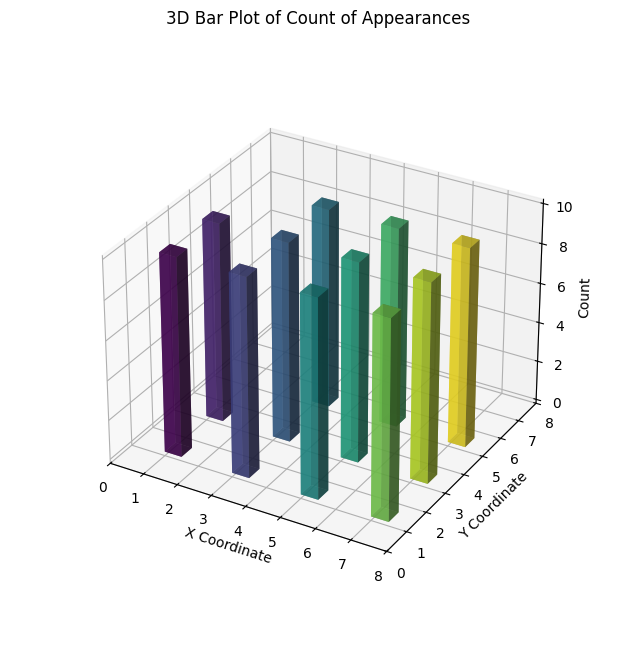

In [31]:
# Count appearances of (X_Coord, Y_Coord) pairs
count_data = combined_df.groupby(['X_Coord', 'Y_Coord']).size().reset_index(name='Count')
print(count_data)
# Create a grid for the surface plot
x = count_data['X_Coord'].unique()
y = count_data['Y_Coord'].unique()
X, Y = np.meshgrid(x, y)

# Prepare the Z values (Count)
Z = np.zeros_like(X)

for i in range(len(count_data)):
    x_idx = np.where(x == count_data['X_Coord'].iloc[i])[0][0]
    y_idx = np.where(y == count_data['Y_Coord'].iloc[i])[0][0]
    Z[y_idx, x_idx] = count_data['Count'].iloc[i]


colors = plt.cm.viridis(np.linspace(0, 1, len(count_data)))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 3D bar plot

x = count_data['X_Coord']
y = count_data['Y_Coord']
z = np.zeros(len(count_data))
dx = dy = 0.5  # Width and depth of bars
dz = count_data['Count']

ax.bar3d(x, y, z, dx, dy, dz, color=colors, alpha=0.7)

ax.set_xlabel('X Coordinate')
ax.set_xlim([0,8])
ax.set_ylabel('Y Coordinate')
ax.set_ylim([0,8])
ax.set_zlabel('Count')

ax.set_title('3D Bar Plot of Count of Appearances')
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()
fig.savefig('./figures/No_Data.png')

## Calculating average in RSSI and Batt


In [32]:
def create_avg_df(combined_df):
    # Group by X_Coord and Y_Coord
    combined_df = combined_df.drop([col for col in combined_df.columns if 'Time' in col], axis=1)

    grouped = combined_df.groupby(['X_Coord', 'Y_Coord']).mean().reset_index()

    # Rename columns to reflect that these are averages
    avg_columns = {col: col.replace('RSSI', 'RSSI_Avg').replace('Batt', 'Batt_Avg') for col in grouped.columns if 'RSSI' in col or 'Batt' in col}
    
    # Apply the renaming to the grouped DataFrame
    grouped.rename(columns=avg_columns, inplace=True)
    
    return grouped

In [33]:
avg_df = create_avg_df(combined_df)
data = avg_df
data

,X_Coord,Y_Coord,Tx_0 RSSI_Avg,Tx_0 Batt_Avg,Tx_1 RSSI_Avg,Tx_1 Batt_Avg,Tx_2 RSSI_Avg,Tx_2 Batt_Avg,Tx_3 RSSI_Avg,Tx_3 Batt_Avg,Tx_4 RSSI_Avg,Tx_4 Batt_Avg,Tx_5 RSSI_Avg,Tx_5 Batt_Avg,Tx_6 RSSI_Avg,Tx_6 Batt_Avg,Tx_7 RSSI_Avg,Tx_7 Batt_Avg
0,1,1,-61.1,4.184000,-78.3,4.186250,-74.300000,4.163333,-78.500,4.168571,-81.333333,4.140000,-75.6,4.138333,-71.700000,4.166667,NaN,NaN
1,1,3,-66.8,4.187143,-66.7,4.188000,-76.888889,4.161111,-67.600,4.168571,-73.200000,4.146000,-73.2,4.135000,-76.200000,4.158750,-75.8,4.182857
2,3,1,-59.1,4.186250,-59.7,4.191250,-71.600000,4.161667,-63.600,4.167143,-83.750000,4.153333,-66.7,4.134000,-78.200000,4.157500,-77.1,4.184000
3,3,3,-67.3,4.185714,-58.0,4.191250,-71.400000,4.160000,-69.300,4.168000,-81.400000,4.150000,-71.8,4.136667,-71.200000,4.160000,-72.3,4.178750
4,3,5,-74.2,4.181429,-64.8,4.191250,-71.100000,4.159000,-77.375,4.160000,-71.900000,4.142222,-63.0,4.132000,-65.900000,4.158750,NaN,NaN
5,5,1,-63.1,4.185000,-68.0,4.191250,-68.300000,4.160000,-68.700,4.165714,-81.285714,4.154000,-65.3,4.140000,-74.200000,4.162500,-75.8,4.183750
6,5,3,-73.9,4.186250,-75.0,4.192857,-71.100000,4.160000,-67.400,4.163750,-74.800000,4.147143,-69.6,4.132500,-66.600000,4.156000,-85.0,NaN
7,5,5,-78.2,4.186667,-73.2,4.185000,-79.444444,4.156667,-66.800,4.165000,-68.000000,4.148000,-67.8,4.133750,-64.200000,4.160000,-78.5,4.185714
8,7,1,-69.5,4.185000,-63.7,4.185556,-66.600000,4.168000,-65.500,4.170000,NaN,NaN,-72.2,4.135000,-81.142857,4.160000,NaN,NaN
9,7,3,-70.7,4.180000,-69.2,4.183333,-72.200000,4.160000,-61.600,4.164444,-80.500000,4.145000,-68.8,4.137500,-68.600000,4.158333,-77.7,4.190000


In [34]:
data.dtypes

X_Coord            int64
Y_Coord            int64
Tx_0 RSSI_Avg    float64
Tx_0 Batt_Avg    float64
Tx_1 RSSI_Avg    float64
Tx_1 Batt_Avg    float64
Tx_2 RSSI_Avg    float64
Tx_2 Batt_Avg    float64
Tx_3 RSSI_Avg    float64
Tx_3 Batt_Avg    float64
Tx_4 RSSI_Avg    float64
Tx_4 Batt_Avg    float64
Tx_5 RSSI_Avg    float64
Tx_5 Batt_Avg    float64
Tx_6 RSSI_Avg    float64
Tx_6 Batt_Avg    float64
Tx_7 RSSI_Avg    float64
Tx_7 Batt_Avg    float64
dtype: object

## Data augmentation by adding noise

In [35]:
Data_Directory = './Data/1m2mreadings'
samples_normalised_2m = np.loadtxt(Data_Directory + '/samples_normalised_2m.txt')
print(samples_normalised_2m)

[-1.48912238  1.11296911  5.08777973 ...  0.6214479  -4.21542827
 -3.68448543]


In [36]:
combined_df

,Tx_0 RSSI,Tx_0 Batt,Tx_0 Time,Tx_1 RSSI,Tx_1 Batt,Tx_1 Time,Tx_2 RSSI,Tx_2 Batt,Tx_2 Time,Tx_3 RSSI,...,Tx_5 Batt,Tx_5 Time,Tx_6 RSSI,Tx_6 Batt,Tx_6 Time,Tx_7 RSSI,Tx_7 Batt,Tx_7 Time,X_Coord,Y_Coord
0,-61,4.18,0.0,-77.0,4.19,0.0,-74.0,4.17,0.0,-77.0,...,4.14,0.0,-72.0,NaN,0.0,NaN,NaN,0.0,1,1
1,-61,4.19,0.0,-80.0,4.17,0.0,-75.0,4.16,0.0,-78.0,...,4.14,0.0,-71.0,4.16,0.0,NaN,NaN,0.0,1,1
2,-61,4.19,0.0,-79.0,4.18,0.0,-75.0,4.16,0.0,-79.0,...,4.14,0.0,-71.0,4.17,0.0,NaN,NaN,0.0,1,1
3,-61,4.18,0.0,-80.0,4.20,0.0,-73.0,4.17,0.0,-76.0,...,4.13,0.0,-71.0,NaN,0.0,NaN,NaN,0.0,1,1
4,-61,4.19,0.0,-78.0,NaN,0.0,-74.0,4.16,0.0,-79.0,...,NaN,0.0,-71.0,NaN,0.0,NaN,NaN,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-74,4.19,0.0,NaN,NaN,0.0,-78.0,4.17,0.0,-60.0,...,4.15,0.0,-63.0,NaN,0.0,-84.0,NaN,0.0,7,5
106,-73,NaN,0.0,NaN,NaN,0.0,-79.0,4.17,0.0,-60.0,...,4.14,0.0,-63.0,4.18,0.0,-82.0,4.18,0.0,7,5
107,-72,4.18,0.0,-81.0,4.18,0.0,-79.0,4.16,0.0,-60.0,...,4.14,0.0,-62.0,NaN,0.0,-82.0,4.18,0.0,7,5
108,-74,NaN,0.0,-82.0,4.18,0.0,-77.0,NaN,0.0,-60.0,...,NaN,0.0,-63.0,4.18,0.0,-81.0,4.19,0.0,7,5


In [47]:
def augment_rssi_data(df, kde_noise_normalized, n_samples):
    augmented_df = pd.DataFrame()
    non_rssi_columns = [col for col in df.columns if 'RSSI' not in col]
    for col in non_rssi_columns:
        augmented_df[col] = df[col].repeat(n_samples).reset_index(drop=True)

    # Iterate through each column in the DataFrame
    for col in df.columns:
        if 'RSSI' in col:  # Check if the column name contains 'RSSI'
            augmented_column = []  # List to hold augmented samples for the current column
            
            for rssi_value in df[col]:  # Iterate through each data entry in the column
                if rssi_value != 0:  # Check if the RSSI value is not zero
                    # Generate 100 augmented samples by adding random samples from kde_noise_normalized
                    augmented_samples = [rssi_value + np.random.choice(kde_noise_normalized) for _ in range(n_samples)]
                    augmented_column.extend(augmented_samples)
                else:
                    # If the value is zero, append NaNs or zero samples
                    augmented_column.extend([np.nan] * n_samples)  # Fill with NaN for zero values

            # Add the augmented samples for the column to the new DataFrame
            augmented_df[col] = pd.Series(augmented_column)

    return augmented_df

samples = 100
augmented_df = augment_rssi_data(combined_df, samples_normalised_2m, samples)


In [48]:
augmented_df

,Tx_0 Batt,Tx_0 Time,Tx_1 Batt,Tx_1 Time,Tx_2 Batt,Tx_2 Time,Tx_3 Batt,Tx_3 Time,Tx_4 Batt,Tx_4 Time,...,X_Coord,Y_Coord,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI
0,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-62.122823,-78.219736,-73.073230,-77.286006,NaN,-72.291308,-68.092918,NaN
1,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-57.891682,-79.382984,-77.857881,-75.587366,NaN,-73.107593,-75.472177,NaN
2,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-60.578826,-81.601987,-74.946047,-75.487762,NaN,-74.452851,-71.910667,NaN
3,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-61.494779,-77.152818,-76.590577,-78.462631,NaN,-73.153706,-71.060839,NaN
4,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-59.505243,-74.228609,-74.372560,-77.772084,NaN,-72.208839,-74.739739,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-77.137070,NaN,-74.352218,-57.951581,-82.165858,-67.218592,-65.694423,-86.684485
10996,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-76.148996,NaN,-77.237336,-66.029147,-84.424917,-66.766892,-62.416035,-80.962738
10997,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-77.476624,NaN,-73.934893,-60.120266,-80.562153,-62.742509,-62.057575,-85.860940
10998,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-76.369396,NaN,-76.292584,-59.539495,-78.707161,-61.001181,-62.323374,-77.912220


In [49]:
Data_Directory = './Data'
file_path = os.path.join(Data_Directory, 'combined_data_withnoise.csv')
augmented_df.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")

Data saved successfully to ./Data\combined_data_withnoise.csv


Do normalisation on data after this (or do in NN?)